In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

<h2> Loading the data from the CSV file into a DataFrame </h2>

In [2]:
df = pd.read_csv('cleaned_data.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,missing_string,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,missing_string,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",missing_string,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,missing_string,missing_string,missing_string,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,missing_string,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


<h2>Checking for Missing Values</h2>

In [3]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

<h2>Creating and Displaying a Feature Summary</h2>

In [4]:
df['feature_summary'] = df['listed_in'] + ', ' + df['type']
print(df[['title', 'feature_summary']].head())

                   title                                    feature_summary
0   Dick Johnson Is Dead                               Documentaries, Movie
1          Blood & Water  International TV Shows, TV Dramas, TV Mysterie...
2              Ganglands  Crime TV Shows, International TV Shows, TV Act...
3  Jailbirds New Orleans                    Docuseries, Reality TV, TV Show
4           Kota Factory  International TV Shows, Romantic TV Shows, TV ...


<h2>Vectorizing Text Data with Custom Tokenizer</h2>

In [5]:
# Initialize the CountVectorizer with a custom tokenizer to split on ', '
feature_vectorizer = CountVectorizer(tokenizer=lambda x: x.split(', '))
# Transform the 'feature_summary' column into a matrix of token counts
feature_matrix = feature_vectorizer.fit_transform(df['feature_summary'])

C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


<h2> Retrieving the vocabulary dictionary from the CountVectorizer</h2>

In [6]:
feature_vectorizer.vocabulary_

{'documentaries': 10,
 'movie': 21,
 'international tv shows': 17,
 'tv dramas': 37,
 'tv mysteries': 39,
 'tv show': 41,
 'crime tv shows': 8,
 'tv action & adventure': 35,
 'docuseries': 11,
 'reality tv': 24,
 'romantic tv shows': 26,
 'tv comedies': 36,
 'tv horror': 38,
 'children & family movies': 4,
 'dramas': 12,
 'independent movies': 15,
 'international movies': 16,
 'british tv shows': 3,
 'comedies': 7,
 'spanish-language tv shows': 29,
 'thrillers': 34,
 'romantic movies': 25,
 'music & musicals': 23,
 'horror movies': 14,
 'sci-fi & fantasy': 27,
 'tv thrillers': 43,
 "kids' tv": 18,
 'action & adventure': 0,
 'tv sci-fi & fantasy': 40,
 'classic movies': 6,
 'anime features': 1,
 'sports movies': 30,
 'anime series': 2,
 'korean tv shows': 19,
 'science & nature tv': 28,
 'teen tv shows': 33,
 'cult movies': 9,
 'tv shows': 42,
 'faith & spirituality': 13,
 'lgbtq movies': 20,
 'stand-up comedy': 31,
 'movies': 22,
 'stand-up comedy & talk shows': 32,
 'classic & cult tv

<h2>Retrieving the list of feature names from the CountVectorizer</h2>

In [7]:
feature_vectorizer.get_feature_names_out()

array(['action & adventure', 'anime features', 'anime series',
       'british tv shows', 'children & family movies',
       'classic & cult tv', 'classic movies', 'comedies',
       'crime tv shows', 'cult movies', 'documentaries', 'docuseries',
       'dramas', 'faith & spirituality', 'horror movies',
       'independent movies', 'international movies',
       'international tv shows', "kids' tv", 'korean tv shows',
       'lgbtq movies', 'movie', 'movies', 'music & musicals',
       'reality tv', 'romantic movies', 'romantic tv shows',
       'sci-fi & fantasy', 'science & nature tv',
       'spanish-language tv shows', 'sports movies', 'stand-up comedy',
       'stand-up comedy & talk shows', 'teen tv shows', 'thrillers',
       'tv action & adventure', 'tv comedies', 'tv dramas', 'tv horror',
       'tv mysteries', 'tv sci-fi & fantasy', 'tv show', 'tv shows',
       'tv thrillers'], dtype=object)

In [23]:
feature_matrix.toarray()[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [9]:
cosine_similarity_matrix = cosine_similarity(feature_matrix, feature_matrix)
cosine_similarity_matrix.shape

(8807, 8807)

In [10]:
cosine_similarity_df = pd.DataFrame(cosine_similarity_matrix, index=df['title'], columns=df['title'])
print(cosine_similarity_df.head())

title                  Dick Johnson Is Dead  Blood & Water  Ganglands  \
title                                                                   
Dick Johnson Is Dead                    1.0       0.000000   0.000000   
Blood & Water                           0.0       1.000000   0.500000   
Ganglands                               0.0       0.500000   1.000000   
Jailbirds New Orleans                   0.0       0.288675   0.288675   
Kota Factory                            0.0       0.500000   0.500000   

title                  Jailbirds New Orleans  Kota Factory  Midnight Mass  \
title                                                                       
Dick Johnson Is Dead                0.000000      0.000000       0.000000   
Blood & Water                       0.288675      0.500000       0.750000   
Ganglands                           0.288675      0.500000       0.250000   
Jailbirds New Orleans               1.000000      0.288675       0.288675   
Kota Factory              

Enter the title of the movie:  Kota Factory


Here are some movies similar to 'Kota Factory':
47     The Smart Money Woman
121           Hotel Del Luna
186     Hometown Cha-Cha-Cha
287           I Need Romance
316             Office Girls
Name: title, dtype: object


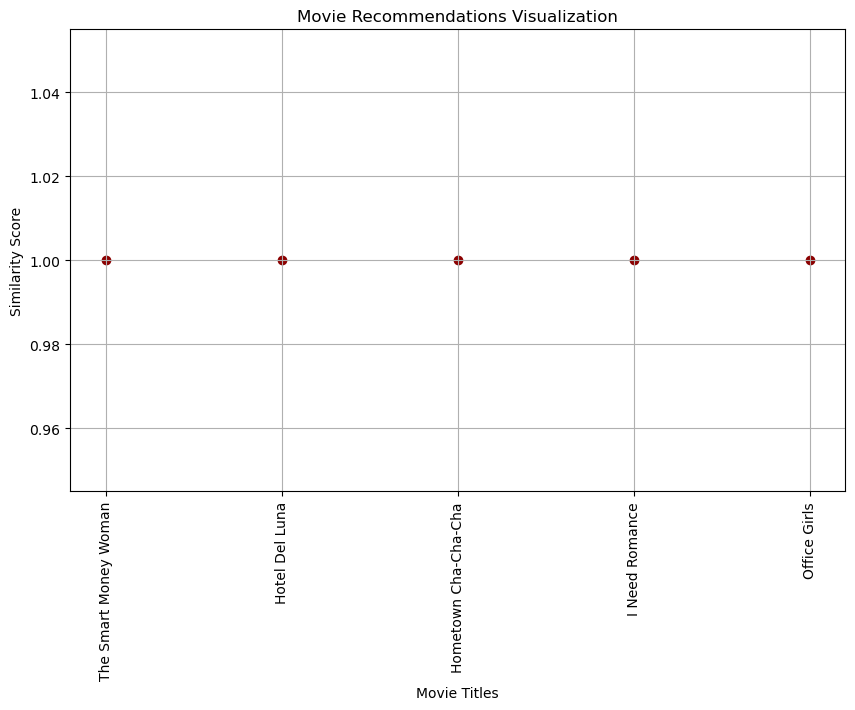

In [21]:
import matplotlib.pyplot as plt

def similar_movies(movie_title, cosine_similarity_df, df, top_n=5):
    try:
        idx = df.index[df['title'] == movie_title].tolist()[0]
        
        sim_scores = list(enumerate(cosine_similarity_df.iloc[idx]))

        sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

        sim_scores = sim_scores[1:top_n + 1]  

        movie_indices = [i[0] for i in sim_scores]
        movie_titles = df['title'].iloc[movie_indices]
        similarity_scores = [i[1] for i in sim_scores]

        return movie_titles, similarity_scores
    except IndexError:
        print("Movie not found!")
        return [], []

def plot_recommendations_scatter(movie_titles, similarity_scores):
    plt.figure(figsize=(10, 6))
    plt.scatter(movie_titles, similarity_scores, color='darkred')
    plt.xlabel('Movie Titles')
    plt.ylabel('Similarity Score')
    plt.title('Movie Recommendations Visualization')
    plt.xticks(rotation=90) 
    plt.grid(True) 
    plt.show()

name = input('Enter the title of the movie: ')

recommended_movies, similarity_scores = similar_movies(name, cosine_similarity_df, df)

if len(recommended_movies) > 0:
    print(f"Here are some movies similar to '{name}':")
    print(recommended_movies)
    
    plot_recommendations_scatter(recommended_movies, similarity_scores)
else:
    print(f"No recommendations found for '{name}'.")
